## Ejercicio 3 

Resuelva las ecuaciones de Painlenvé numericamente para encontrar la distribución Tracy-Widom para $\beta= 1,2$. Se recomienda seguir la sección 2.4 de *Random Matrix Theory and its Innovative Applications (A. Edelman,2013)*

In [12]:
#librerías
library("deSolve")
library("gsl")
library("numDeriv")
library("pracma")
library("deTestSet")

Para $\beta = 2$
$$F_2(s) = exp \left ( -\int_{s}^{\infty} (x-s)^2q(x)dx \right )$$

In [34]:
#parámetros
t0 <- 5
tn <- -6
#donde se va evaluar
tseq <- seq(t0, tn, length.out = 10000)
# ecuación diferencial a resolver
deq <- function (t,y,parms){
    list (c(y[2],t * y[1] + 2 * y[1] ^ 3, y[4], y[1] ^ 2) ) }

#condiciones
y0 <-  c(airy_Ai(t0), airy_Ai_deriv(t0), 0, airy_Ai(t0) ^ 2)
#solución de la ecuación
F_ode <- ode(y=y0, times=tseq, func=deq, parms=NULL, method="rk4")
#la distribucuion
F2 <- exp(-F_ode[, "3"])
#la densidad
f2 <- gradient(F2, tseq)

Para $\beta=1$
$$F_1(s)= \sqrt{ F_2(s) exp \left ( -\int_{s}^{\infty} q(x)dx \right ) }$$

In [35]:
t0 <- 5
tn <- -6
deq <- function(t, x, parms) {
  list(c(x[2],t * x[1] + 2 * x[1] ^ 3,x[4],x[1])) }

tseq <- seq(t0, tn, length.out = 10000)
x0 <- c(airy_Ai(t0),airy_Ai_deriv(t0),0,airy_Ai(t0) ^ 2)

F_ode <- ode(y=x0, times=tseq, func=deq, parms=NULL, method="rk4")

#la distribucuion aquí cambia respecto a beta=2
F1 <- sqrt(F2*exp(-F_ode[, "3"]))
#la densidad
f1 <- gradient(F1, tseq)


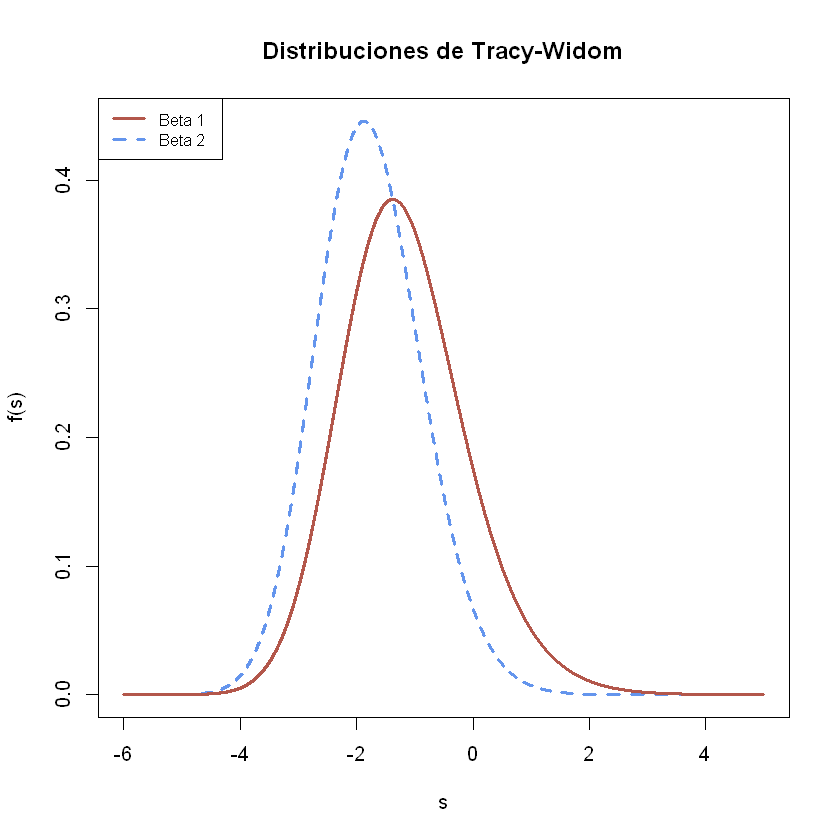

In [63]:
#grafico
plot(tseq,f2, col="#6495ed", type="l",lty=2, lwd=3,
    xlab ="s", ylab="f(s)", main="Distribuciones de Tracy-Widom" )
lines(tseq,f1, col="#b3574b",lty=1, lwd=3)
legend("topleft", legend = c("Beta 1", "Beta 2"),
       col = c("#b3574b", "#6495ed"), lty = 1:2, lwd=c(3,3), cex = 0.8)

## Ejercicio 4
Suponga que en una muestra de $n=10$ observaciones viene de una población con distribución $N_{10}(0, \Sigma)$, y encontramos que el eigenvalor propio más grande de la muestra es $\hat{\lambda_1} = 4.3$

* **¿Este valor es consistente con la hipótesis $H_0 = W_{10}(10, I)$ aún y cuando el valor de 4.3 cae fuera del suporte $[0,4]$ de la distribución de Marcenko-Pastur?**

Reescalaremos este valor con la aproximación de 2do orden que vimos en clase para hacerlo comparable con los datos obtenidos anteriormente

In [66]:
#escalamiento
n=10
p=10
mu = (sqrt(n-1/2)+sqrt(p-1/2))^2
sigma = ( sqrt(n-1/2)+sqrt(p-1/2))*((1/sqrt(n-1/2) + 1/sqrt(p-1/2))^(1/3))
lambda_est <- (n*4.3 -mu)/sigma

print(lambda_est)

[1] 0.9368904


En lugar de 4.3 haremos las pruebas con el valor 0.9368

Si observamos el soporte o como se comporta la distribución de Tracy-Widom podemos observar que este número (.9368) se encuentra dentro de nuestro rango de evaluación, por lo que, a pesar que no esté en el soporte de Macenko-Pasteur, para esta distribución si tiene un valor asociado

* **Utilizando la aproximación a 2do orden calcule la probabilidad de encontrar un valor más extremo a 4.3**

In [88]:
# Para este ejercicio utilizaremos la libería que existe en R 
# sobre la distribución de Tracy_Widom, ya que no sé si los resultados
# del ejercicio anterior estén del todo correcto
library("RMTstat")
#vamos a obtener la función de distribución de este valor
pr <- 1 - ptw(lambda_est)
pr

[1] 0.05302342

La probabilidad es del 5.30%

* **Rechace o acepte la hipótesis nula $H_0$ bajo un nivel de significancia del 1%; 5% y 10%**

In [90]:
# Obtendremos los cuantiles para esas medidas
q_01 = qtw(.99)
q_05 = qtw(.95)
q_1 = qtw(.9)

#vemos si son mayores que mi valor

q_01>lambda_est
q_05>lambda_est
q_1>lambda_est


[1] TRUE

[1] TRUE

[1] FALSE

In [89]:
pr<.01
pr<.05
pr<.1

[1] FALSE

[1] FALSE

[1] TRUE

Solo rechazamos para $\alpha=10\%$

**Conclusiones**

Conocer cómo se distribuyen los eigenvalores más grandes nos puede ayudar a saber si una matriz corresponde a cierto ensemble.
También ahora que se tiene disponible alguna prueba de hipótesis, podemos tener un sustento estadístico para poder operar con matrices según el ensemble asignado, o justo también para saber si no pertenecen a un grupo específico justificar si es necesario un tratamiento diferente.
